# **Practica 4:** 1D and 2D GRF : Using Fourier Space and then Spherical Harmonics for CMB

### *Métodos Estadísticos y Numéricos en Cosmología*

#### *Hugo Rivera Morales*

In [1]:
#Paqueterias
import numpy as np
import matplotlib.pyplot as plt

We know that, in 1D, a real GRF $\delta(r)$ is a central random fiel (mean 0) written as

$$
    \delta(r) = \sum_{k = k_{min}}^{k_{max}} \delta_k e^{ik\cdot r} = \sum_{k_{min}}^{k_{max}} 2 \times \text{Re} \left( \delta_k e^{ik\cdot r} \right) + \delta_0,
$$

with $\delta_k$ the Fourier coefficients, $\delta_0 \in \mathbb{R}$, such that $\delta_k$ satisfies realness for the field $\delta(r)$ as

$$ \delta_{-k} = \delta_k^{*} $$

Also, this Fourier coefficients (complex numbers in general) can be expressed in the polar form as

$$
    \delta_k = \alpha_k e^{i\phi_k}
$$

with $\alpha_k$ the module of the complex number computed as a random trial of the gaussian (normal) PDF $\mathcal{N}(0,\sigma^2)$ with variance $P(k)$, and $\phi_k$ being the phase of this complex number, computed as a uniform random trial $\mathcal{U}\left( [0,2\pi] \right)$. Here, the phase also has to satisfy $\phi_{-k} = -\phi_k$.

## 1 1 power spectra, 5 random realizations

1) Create a 1D real space array in order to define your real space framework : between 0 and 10 with 10000 values.

In [2]:
# 1D array in real space
num_values = 10000
x_array = np.linspace(0, 10, num_values)
dx = 10/num_values

2) Get the corresponding frequencies using np.fft.fftfreq() with the corresponding binning information (the keyword start with a "d", finish with a "d" and is just one letter...)

In [3]:
# Getting freqs
k_freq = np.fft.fftfreq(x_array.shape[0], dx)

2) Create a Power spectrum $P(k) = (|k| + \epsilon)^{−2}$ with $\epsilon = 0.1$

In [4]:
# Power spectrum 1
epsilon = 0.1
def power_spectrum(k):
    return (abs(k) + epsilon)**(-2)

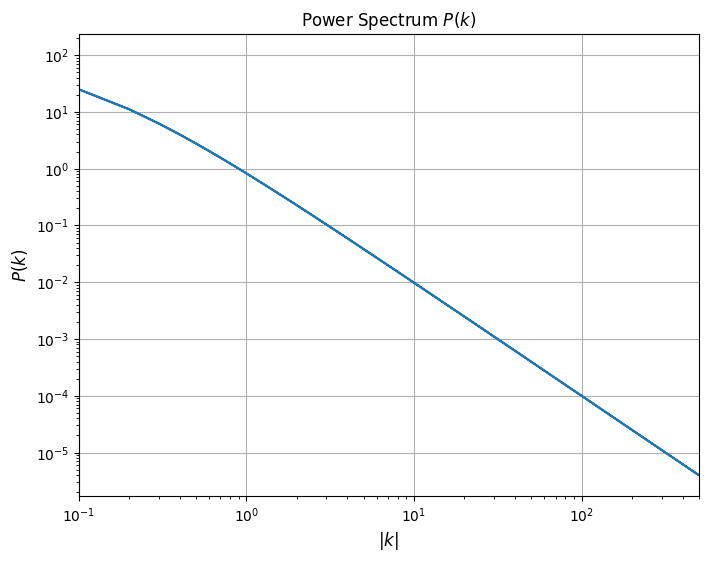

In [5]:
# Plot P(k)
plt.figure(figsize=(8, 6))
plt.loglog(abs(k_freq), power_spectrum(k_freq))
plt.xlim(0.1,max(abs(k_freq)))
plt.title('Power Spectrum $P(k)$')
plt.xlabel('$|k|$', fontsize = 12)
plt.ylabel('$P(k)$', fontsize = 12)
plt.grid(True)
plt.show()

3) Generate five random realizations of the Fourier coefficients $\delta_k$, respecting the fact that the field is real.

In [6]:
# Generating five random realizations (understanding a realization as a random sampling with certain variance)

# For the modules alpha_k of the Fourier coef. δ𝑘
# The square root is because np.random.normal ask for the standar deviation (sigma) instead of variance (sigma**2)
sigma = np.sqrt(power_spectrum(k_freq))
alpha1 = np.random.normal(0, sigma, size=num_values) 
alpha2 = np.random.normal(0, sigma, size=num_values)
alpha3 = np.random.normal(0, sigma, size=num_values)
alpha4 = np.random.normal(0, sigma, size=num_values)
alpha5 = np.random.normal(0, sigma, size=num_values)
# Condition δ_-𝑘 = δ𝑘*
for i in range(num_values//2):
    alpha1[-i] = alpha1[i]
    alpha2[-i] = alpha2[i]
    alpha3[-i] = alpha3[i]
    alpha4[-i] = alpha4[i]
    alpha5[-i] = alpha5[i]

# Analogously for the phase values, but with uniform PDF, respecting the fact that the field has to be real
phse1 = np.random.uniform(0, 2*np.pi, size=num_values)
phse2 = np.random.uniform(0, 2*np.pi, size=num_values)
phse3 = np.random.uniform(0, 2*np.pi, size=num_values)
phse4 = np.random.uniform(0, 2*np.pi, size=num_values)
phse5 = np.random.uniform(0, 2*np.pi, size=num_values)
# Condition phi_-k = -phi_k
for i in range(num_values//2):
    phse1[-i] = -phse1[i]
    phse2[-i] = -phse2[i]
    phse3[-i] = -phse3[i]
    phse4[-i] = -phse4[i]
    phse5[-i] = -phse5[i]

# Ahora se calculan las delta(k)
delta_k1 = alpha1*np.exp(1j*phse1)
delta_k2 = alpha2*np.exp(1j*phse2)
delta_k3 = alpha3*np.exp(1j*phse3)
delta_k4 = alpha4*np.exp(1j*phse4)
delta_k5 = alpha5*np.exp(1j*phse5)

# Haciendo el término k=0 real (in order to get a whole real field, bc exp{phi_k} for k=0 is 1)
delta_k1[0] = np.real(delta_k1[0]) 
delta_k2[0] = np.real(delta_k2[0])
delta_k3[0] = np.real(delta_k3[0])
delta_k4[0] = np.real(delta_k4[0])
delta_k5[0] = np.real(delta_k5[0])

- Do the inverse Fourier transform of the 5 realizations. Plot the 5 realizations.

In [7]:
# Taking the inverse FT of these realizations
delta1 = np.fft.ifft(delta_k1)
delta2 = np.fft.ifft(delta_k2)
delta3 = np.fft.ifft(delta_k3)
delta4 = np.fft.ifft(delta_k4)
delta5 = np.fft.ifft(delta_k5)

- Are they different? Do they look generating from a similar random process?

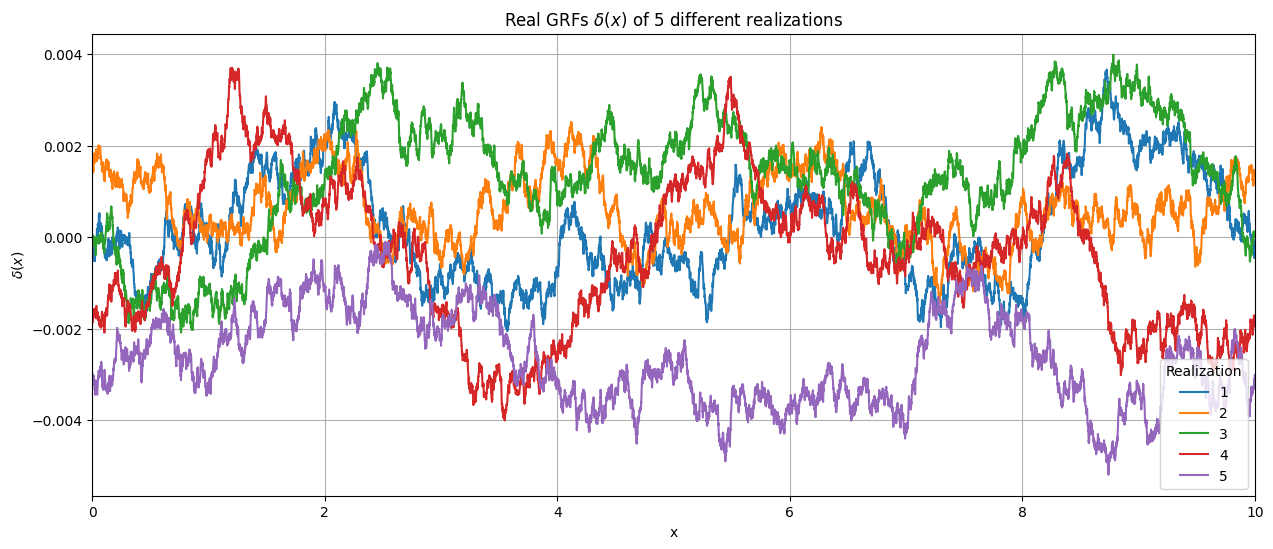

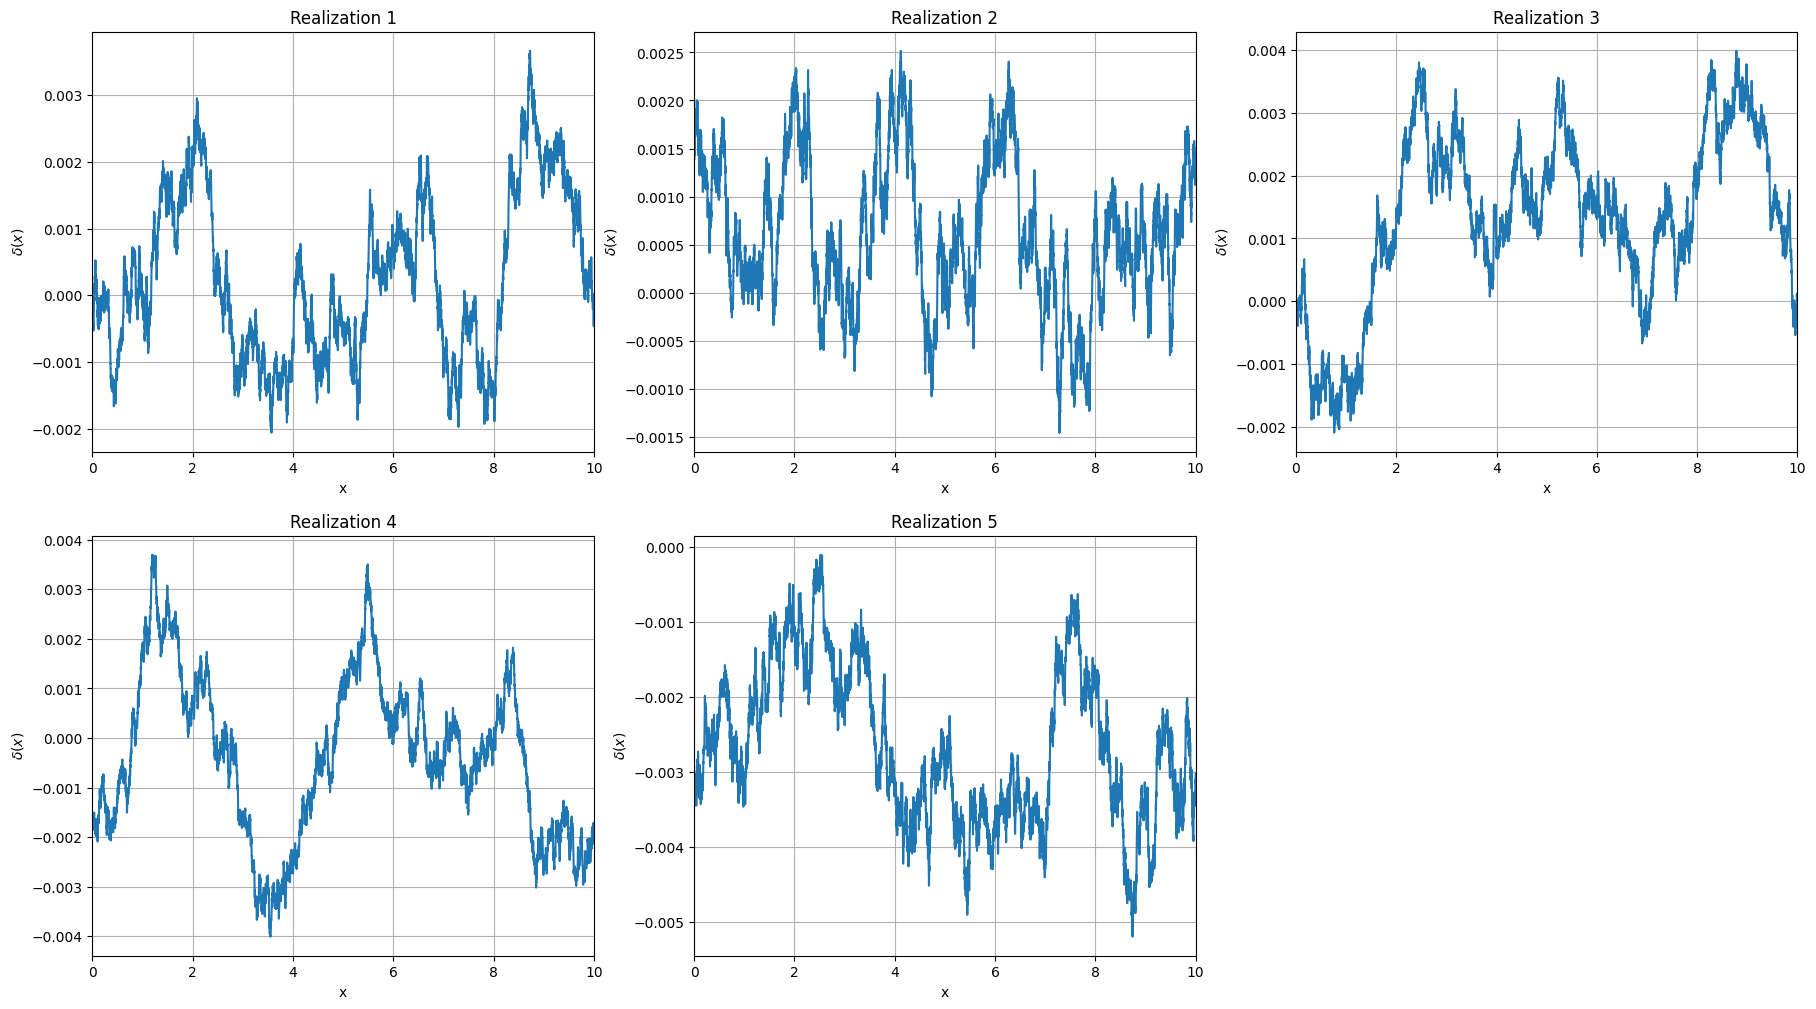

In [9]:
# Plots delta(x)
# 5 Realizaciones juntas
plt.figure(figsize=(15, 6))
plt.plot(x_array, delta1.real, label='1')
plt.plot(x_array, delta2.real, label='2')
plt.plot(x_array, delta3.real, label='3')
plt.plot(x_array, delta4.real, label='4')
plt.plot(x_array, delta5.real, label='5')
plt.xlim(0,10)
plt.legend(title = "Realization", loc='lower right')
plt.xlabel('x')
plt.ylabel('$\\delta (x)$')
plt.title('Realization 1')
plt.title('Real GRFs $\delta(x)$ of 5 different realizations')
plt.grid(True)
plt.show()

# Comparación de 2 realizaciones
figure, fig = plt.subplots(2,3)
# Realization 1
fig[0,0].plot(x_array, delta1.real) 
fig[0,0].set_title(r'Realization 1')
fig[0,0].set_xlim(0,10)
fig[0,0].set_xlabel('x')
fig[0,0].set_ylabel('$\\delta (x)$')
fig[0,0].grid(True)
# Realization 2
fig[0,1].plot(x_array, delta2.real) 
fig[0,1].set_title(r'Realization 2')
fig[0,1].set_xlim(0,10)
fig[0,1].set_xlabel('x')
fig[0,1].set_ylabel('$\\delta (x)$')
fig[0,1].grid(True)
# Realization 3
fig[0,2].plot(x_array, delta3.real) 
fig[0,2].set_title(r'Realization 3')
fig[0,2].set_xlim(0,10)
fig[0,2].set_xlabel('x')
fig[0,2].set_ylabel('$\\delta (x)$')
fig[0,2].grid(True)
# Realization 4
fig[1,0].plot(x_array, delta4.real) 
fig[1,0].set_title(r'Realization 4')
fig[1,0].set_xlim(0,10)
fig[1,0].set_xlabel('x')
fig[1,0].set_ylabel('$\\delta (x)$')
fig[1,0].grid(True)
# Realization 5
fig[1,1].plot(x_array, delta5.real) 
fig[1,1].set_title(r'Realization 5')
fig[1,1].set_xlim(0,10)
fig[1,1].set_xlabel('x')
fig[1,1].set_ylabel('$\\delta (x)$')
fig[1,1].grid(True)

fig[-1,-1].axis('off')

plt.rcParams["figure.figsize"] = (22,12)
plt.show()

## 2 3 power spectra, 1 random realizations

- Create a 1D real space array in order to define your real space framework : between 0 and 10 with 1000 values.

- Get the corresponding frequencies using np.fft.fftfreq() with the corresponding binning information

- Create a Power spectrum $P_2(k) = (|k| + \epsilon)^{−2}$, $P_3(k) = (|k| + \epsilon)^{−3}$ and $P_4(k) = (|k| + \epsilon)^{−4}$ with $\epsilon = 0.001$

In [10]:
# Power spectrum's 2, 3 y 4
epsilon = 0.001
def power_spectrum2(k):
    return (abs(k) + epsilon)**(-2)
def power_spectrum3(k):
    return (abs(k) + epsilon)**(-3)
def power_spectrum4(k):
    return (abs(k) + epsilon)**(-4)

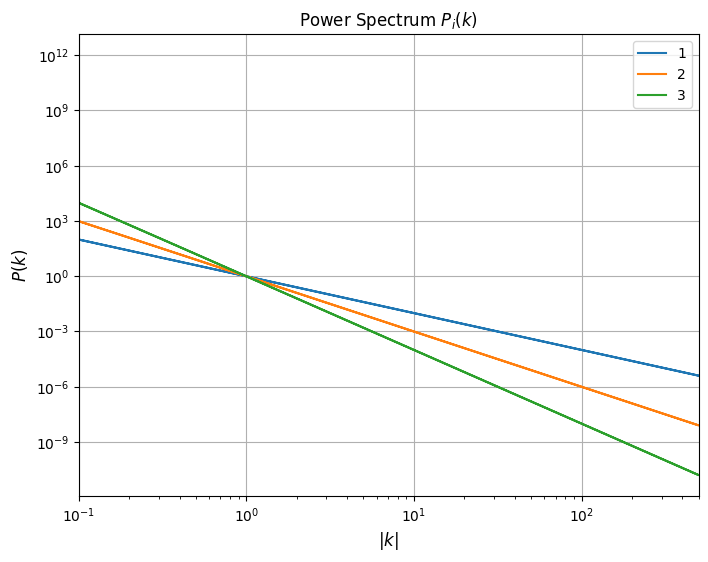

In [11]:
# Plot de los P(k)
plt.figure(figsize=(8, 6))
plt.loglog(abs(k_freq), power_spectrum2(k_freq), label = '1')
plt.loglog(abs(k_freq), power_spectrum3(k_freq), label = '2')
plt.loglog(abs(k_freq), power_spectrum4(k_freq), label = '3')
plt.xlim(0.1,max(abs(k_freq)))
plt.title('Power Spectrum $P_i(k)$')
plt.legend()
plt.xlabel('$|k|$', fontsize = 12)
plt.ylabel('$P(k)$', fontsize = 12)
plt.grid(True)
plt.show()

- Generate only one random realization you will use to generate the 3 series of the Fourier coefficients $\delta_k$ (following $P_2(k), P_3(k)$ and $P_4(k)$), respecting the fact that the fields are real.

In [12]:
# Making a single random realization for each P(k)
# For the modules alpha_k of the Fourier coef. δ𝑘
alpha_pk2 = np.random.normal(0, np.sqrt(power_spectrum2(k_freq)), size=num_values)
alpha_pk3 = np.random.normal(0, np.sqrt(power_spectrum3(k_freq)), size=num_values)
alpha_pk4 = np.random.normal(0, np.sqrt(power_spectrum4(k_freq)), size=num_values)
# Condition δ_-𝑘 = δ𝑘*
for i in range(num_values//2):
    alpha_pk2[-i] = alpha_pk2[i]
    alpha_pk3[-i] = alpha_pk3[i]
    alpha_pk4[-i] = alpha_pk4[i]

# For the phase values phi
phase_pk2 = np.random.uniform(0,2*np.pi, size=num_values)
phase_pk3 = np.random.uniform(0,2*np.pi, size=num_values)
phase_pk4 = np.random.uniform(0,2*np.pi, size=num_values)
# Condition for the phase phi_-k = -phi_k
for i in range(num_values//2):
    phase_pk2[-i] = -phase_pk2[i] 
    phase_pk3[-i] = -phase_pk3[i]
    phase_pk4[-i] = -phase_pk4[i]

# Getting the delta(k)
delta_k_pk2 = alpha_pk2*np.exp(1j*phase_pk2)
delta_k_pk3 = alpha_pk3*np.exp(1j*phase_pk3)
delta_k_pk4 = alpha_pk4*np.exp(1j*phase_pk4)

# Haciendo el término k=0 real
delta_k_pk2[0] = np.real(delta_k_pk2[0])
delta_k_pk3[0] = np.real(delta_k_pk3[0])
delta_k_pk4[0] = np.real(delta_k_pk4[0])

- Do the inverse Fourier transform of the 3 realizations. Plot the 3 realizations.

In [13]:
# Taking the inverse FT of these realizations
delta_pk2 = np.fft.ifft(delta_k_pk2)
delta_pk3 = np.fft.ifft(delta_k_pk3)
delta_pk4 = np.fft.ifft(delta_k_pk4)

- What can you conclude?

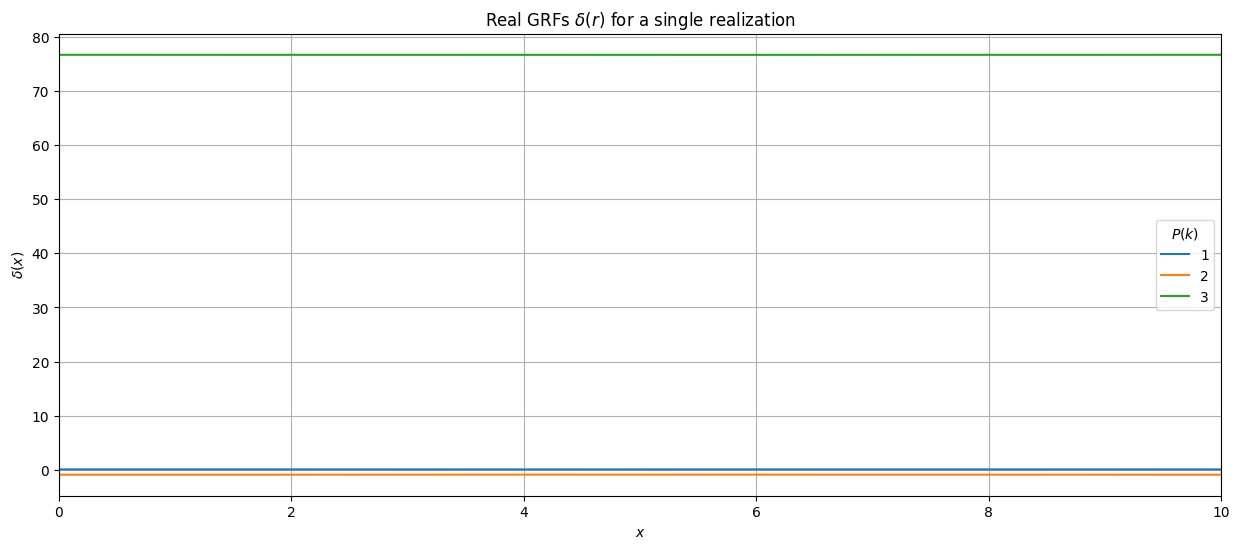

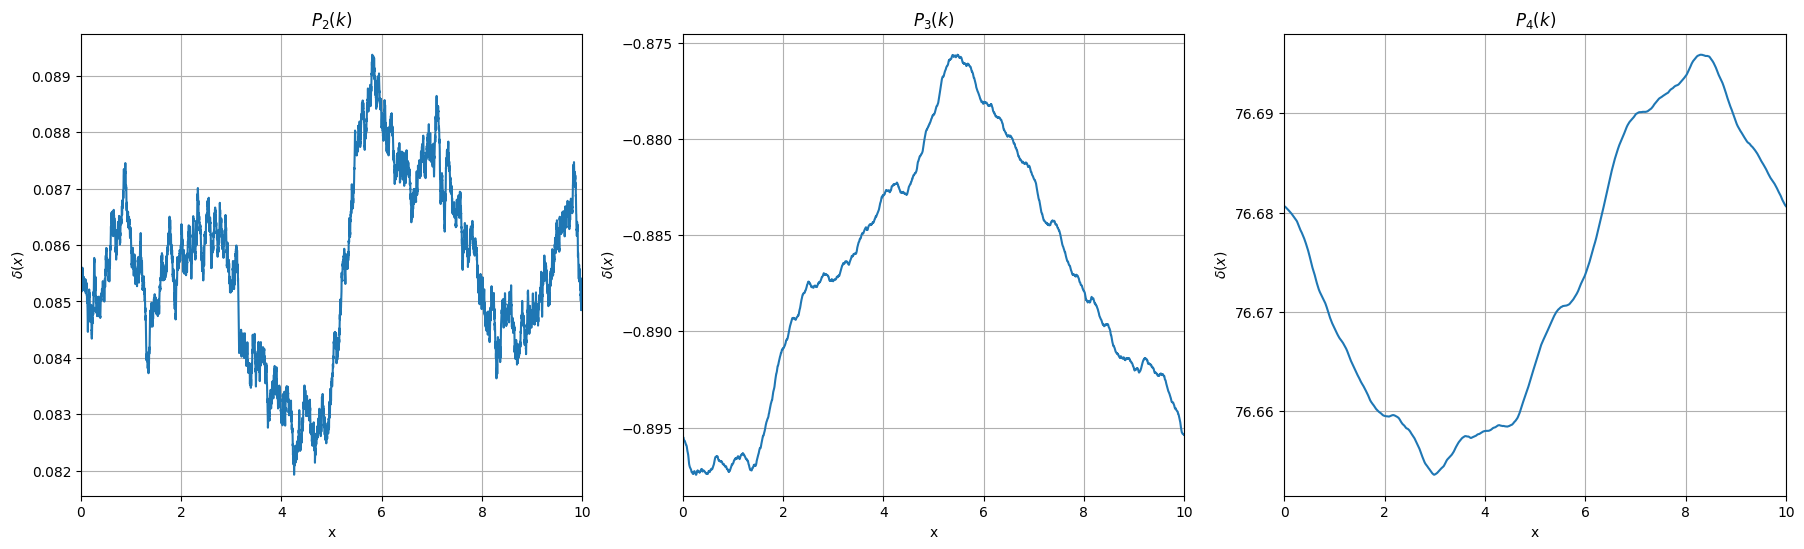

In [15]:
# Plots delta(x)
# 3 Realizaciones juntas
plt.figure(figsize=(15, 6))
plt.plot(x_array, delta_pk2.real, label='1') 
plt.plot(x_array, delta_pk3.real, label='2')
plt.plot(x_array, delta_pk4.real, label='3')
plt.xlim(0,10)
plt.legend(title = "$P(k)$")
plt.xlabel('$x$')
plt.ylabel('$\\delta (x)$')
plt.title('Realization 1')
plt.title('Real GRFs $\delta(r)$ for a single realization')
plt.grid(True)
plt.show()

# 3 Realizaciones separadas
figure, fig = plt.subplots(1,3)
# Realization 1
fig[0].plot(x_array, delta_pk2.real) 
fig[0].set_title(r'$P_2(k)$')
fig[0].set_xlim(0,10)
fig[0].set_xlabel('x')
fig[0].set_ylabel('$\\delta (x)$')
fig[0].grid(True)
# Realization 2
fig[1].plot(x_array, delta_pk3.real) 
fig[1].set_title(r'$P_3(k)$')
fig[1].set_xlim(0,10)
fig[1].set_xlabel('x')
fig[1].set_ylabel('$\\delta (x)$')
fig[1].grid(True)
# Realization 3
fig[2].plot(x_array, delta_pk4.real) 
fig[2].set_title(r'$P_4(k)$')
fig[2].set_xlim(0,10)
fig[2].set_xlabel('x')
fig[2].set_ylabel('$\\delta (x)$')
fig[2].grid(True)

plt.rcParams["figure.figsize"] = (22,6)
plt.show()

Vamos a observar como contribuyen algunos de los modos $k$ al campo de contraste de densidad $\delta(k)$ para los 3 power spectrum

In [16]:
print('For the power spectrum 2, some values of the density contrast are: \n', 'k = 0:', f'{delta_k_pk2.real[0]},', 'Max:', f'{max(delta_k_pk2.real)},','Min:', f'{min(delta_k_pk2.real)}')
print('For the power spectrum 2, some values of the density contrast are: \n', 'k = 0:', f'{delta_k_pk3.real[0]},', 'Max:', f'{max(delta_k_pk3.real)},','Min:', f'{min(delta_k_pk3.real)}')
print('For the power spectrum 2, some values of the density contrast are: \n', 'k = 0:', f'{delta_k_pk4.real[0]},', 'Max:', f'{max(delta_k_pk4.real)},','Min:', f'{min(delta_k_pk4.real)}')

For the power spectrum 2, some values of the density contrast are: 
 k = 0: 855.5367032068366, Max: 855.5367032068366, Min: -2.4164757246016504
For the power spectrum 2, some values of the density contrast are: 
 k = 0: -8872.125062346831, Max: 2.4895537190217496, Min: -8872.125062346831
For the power spectrum 2, some values of the density contrast are: 
 k = 0: 766735.3487202215, Max: 766735.3487202215, Min: -6.410732533801643


Evidentemente los valores de $k = 0$ dominan sobre el resto, por lo que vamos a eliminarlos.

In [17]:
# Ya que el termino k = 0 domina sobre el resto, vamos a quitarlo
delta_k_pk2[0] = 0
delta_k_pk3[0] = 0
delta_k_pk4[0] = 0
# Taking the inverse FT of these realizations
delta_pk2 = np.fft.ifft(delta_k_pk2)
delta_pk3 = np.fft.ifft(delta_k_pk3)
delta_pk4 = np.fft.ifft(delta_k_pk4)

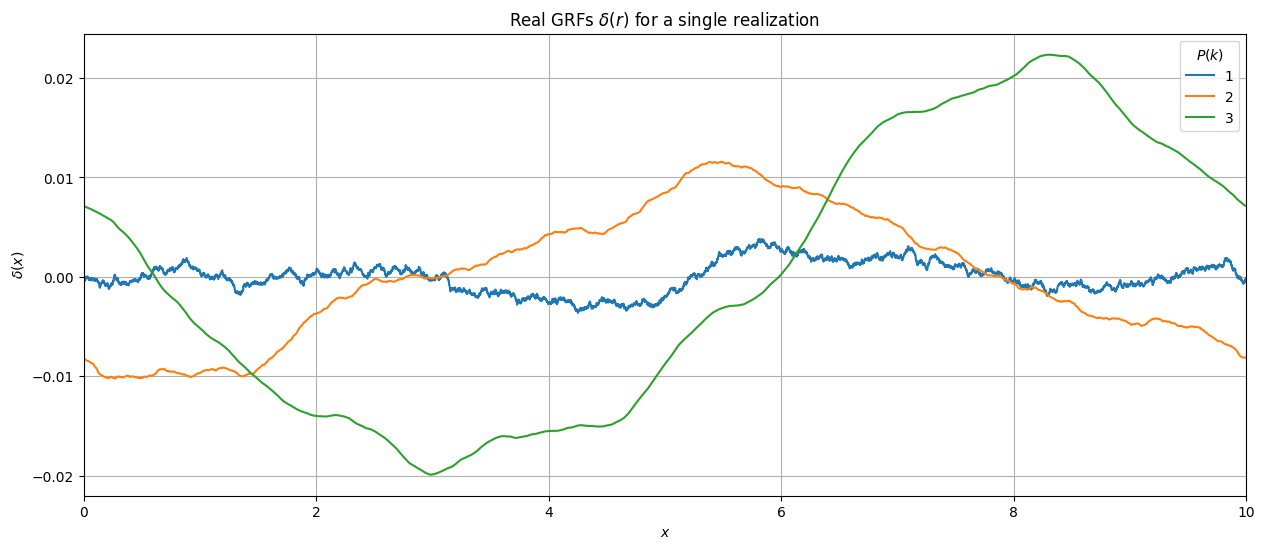

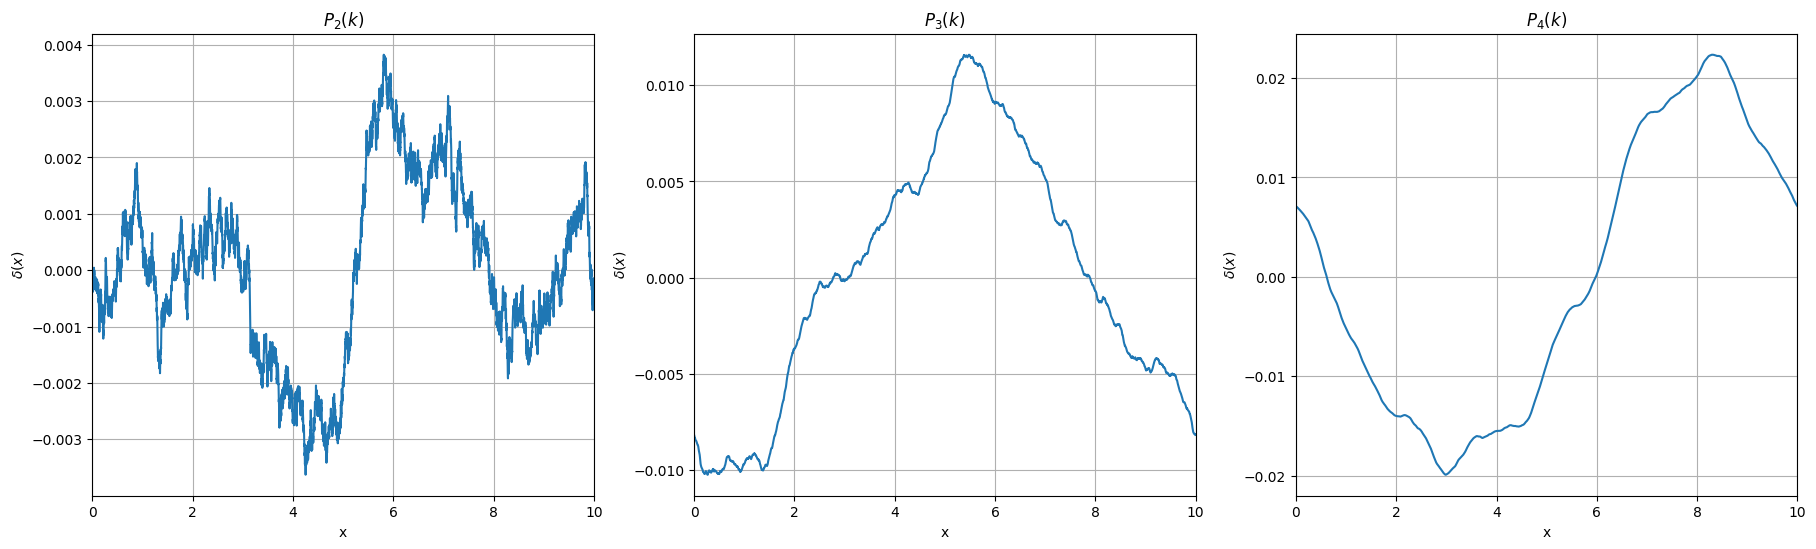

In [19]:
# Plots delta(x) (sin los modos k = 0)
# 3 Realizaciones juntas
plt.figure(figsize=(15, 6))
plt.plot(x_array, delta_pk2.real, label='1') 
plt.plot(x_array, delta_pk3.real, label='2')
plt.plot(x_array, delta_pk4.real, label='3')
plt.xlim(0,10)
plt.legend(title = "$P(k)$")
plt.xlabel('$x$')
plt.ylabel('$\\delta (x)$')
plt.title('Realization 1')
plt.title('Real GRFs $\delta(r)$ for a single realization')
plt.grid(True)
plt.show()

# 3 Realizaciones separadas
figure, fig = plt.subplots(1,3)
# Realization 1
fig[0].plot(x_array, delta_pk2.real) 
fig[0].set_title(r'$P_2(k)$')
fig[0].set_xlim(0,10)
fig[0].set_xlabel('x')
fig[0].set_ylabel('$\\delta (x)$')
fig[0].grid(True)
# Realization 2
fig[1].plot(x_array, delta_pk3.real) 
fig[1].set_title(r'$P_3(k)$')
fig[1].set_xlim(0,10)
fig[1].set_xlabel('x')
fig[1].set_ylabel('$\\delta (x)$')
fig[1].grid(True)
# Realization 3
fig[2].plot(x_array, delta_pk4.real) 
fig[2].set_title(r'$P_4(k)$')
fig[2].set_xlim(0,10)
fig[2].set_xlabel('x')
fig[2].set_ylabel('$\\delta (x)$')
fig[2].grid(True)

plt.rcParams["figure.figsize"] = (22,6)
plt.show()

## 3 Generate a Gaussian Random Field in 2D

As for the exercise to generate a Gaussian Random Field in 1D, you will use a similar power spectrum definition but in 2D space:

- Create a 2D real space array in order to define your real space framework : between 0 and 10 with 100 per 100 values (so a 100 × 100 matrix).

In [20]:
# Creating the lattice
num_values = 100
xy_arr  = np.random.uniform(0,10,(num_values,num_values)) 
dx = 10/num_values
dy = 10/num_values

- Get the corresponding frequencies using np.fft.fftfreq() with the corresponding binning information and generate the corresponding 2D array of values $k = \sqrt{k_x^2 + k_y^2}$

In [21]:
# Getting the k_freqs
k_x = np.fft.fftshift(np.fft.fftfreq(xy_arr.shape[0],dx))
k_y = np.fft.fftshift(np.fft.fftfreq(xy_arr.shape[1],dy))
# Array for the |k| values
k_freq = np.sqrt(k_x**2 + k_y**2)
# Array for the k values on the lattice (100x100 matrix)
k_arr = np.zeros((num_values,num_values))
for i in range(num_values):
    for j in range(num_values):
        k_arr[i,j] = np.sqrt(k_x[i]**2 + k_y[j]**2)

- Create a Power spectrum $P(k) = (|k| + \epsilon)^{−2}$ with $\epsilon = 0.1$ in 2D space using the previous array.

In [22]:
# Computing the P(k)
epsilon = 0.1
# P(k) solo dependiendo del modulo de k
def power_spectrum(kx, ky):    
    return  1/(np.sqrt(kx**2 + ky**2) + epsilon)**2
# P(k) en la lattice (ya que Pk será una matriz 100x100 que en cada punto de un valor)
Pk_arr_2D = (np.abs(k_arr) + epsilon)**(-2)

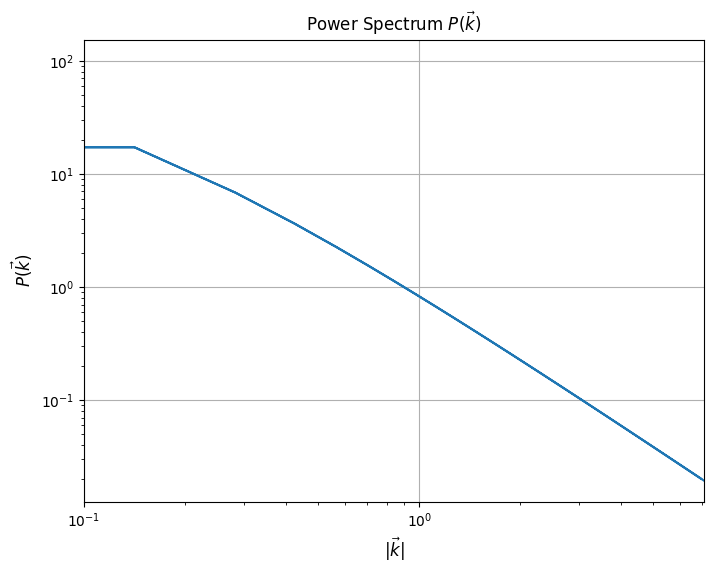

In [23]:
# Plot de P(k)
plt.figure(figsize=(8, 6))
plt.loglog(abs(k_freq), power_spectrum(k_x,k_y))
plt.title('Power Spectrum $P(\\vec{k})$')
plt.xlim(0.1,max(abs(k_freq)))
plt.xlabel('$|\\vec{k}|$', fontsize = 12)
plt.ylabel('$P(\\vec{k})$', fontsize = 12)
plt.grid(True)
plt.show()

- Generate five random realizations of the Fourier coefficients $\delta_k$, respecting the fact that the field is real.

In [24]:
# Generating five random realizations
# The square root is because np.random.normal ask for the standar deviation (sigma) instead of variance (sigma**2)
sigma = np.sqrt(Pk_arr_2D)
# For the modules alpha_k of the Fourier coef. δ𝑘 (esta vez alpha va a ser una matriz 100x100 ya que tenemos kx y ky)
alpha2D_1 = np.zeros((num_values,num_values))
alpha2D_2 = np.zeros((num_values,num_values))
alpha2D_3 = np.zeros((num_values,num_values))
alpha2D_4 = np.zeros((num_values,num_values))
alpha2D_5 = np.zeros((num_values,num_values))
for i in range(num_values):
    for j in range(num_values):
        alpha2D_1[i,j] = np.random.normal(0.0, sigma[i,j],size=1)
        alpha2D_2[i,j] = np.random.normal(0.0, sigma[i,j],size=1)
        alpha2D_3[i,j] = np.random.normal(0.0, sigma[i,j],size=1)
        alpha2D_4[i,j] = np.random.normal(0.0, sigma[i,j],size=1)
        alpha2D_5[i,j] = np.random.normal(0.0, sigma[i,j],size=1)

# Analogously for the phase values
phase_1 = np.random.uniform(0, 2*np.pi, size=(num_values,num_values))
phase_2 = np.random.uniform(0, 2*np.pi, size=(num_values,num_values))
phase_3 = np.random.uniform(0, 2*np.pi, size=(num_values,num_values))
phase_4 = np.random.uniform(0, 2*np.pi, size=(num_values,num_values))
phase_5 = np.random.uniform(0, 2*np.pi, size=(num_values,num_values))

# Ahora se calculan las delta(k)
delta_k1 = np.zeros((num_values,num_values), dtype=complex)
delta_k2 = np.zeros((num_values,num_values), dtype=complex)
delta_k3 = np.zeros((num_values,num_values), dtype=complex)
delta_k4 = np.zeros((num_values,num_values), dtype=complex)
delta_k5 = np.zeros((num_values,num_values), dtype=complex)
for i in range(num_values):
    for j in range(num_values):
        delta_k1[i,j] = alpha2D_1[i,j]*np.exp(1j*phase_1[i,j])
        delta_k2[i,j] = alpha2D_2[i,j]*np.exp(1j*phase_2[i,j])
        delta_k3[i,j] = alpha2D_3[i,j]*np.exp(1j*phase_3[i,j])
        delta_k4[i,j] = alpha2D_4[i,j]*np.exp(1j*phase_4[i,j])
        delta_k5[i,j] = alpha2D_5[i,j]*np.exp(1j*phase_5[i,j])

# Condition δ_-𝑘 = δ*_𝑘
for i in range(num_values//2):
    for j in range(num_values//2):
        delta_k1[-i][-j] = np.conj(delta_k1[i][j])
        delta_k2[-i][-j] = np.conj(delta_k2[i][j])
        delta_k3[-i][-j] = np.conj(delta_k3[i][j])
        delta_k4[-i][-j] = np.conj(delta_k4[i][j])
        delta_k5[-i][-j] = np.conj(delta_k5[i][j])

# Making the terms of k=0 real
delta_k1[50][50] = np.real(delta_k1[50][50]) 
delta_k2[50][50] = np.real(delta_k2[50][50])
delta_k3[50][50] = np.real(delta_k3[50][50])
delta_k4[50][50] = np.real(delta_k4[50][50])
delta_k5[50][50] = np.real(delta_k5[50][50])

- Do the inverse Fourier transform of the 5 realizations. Plot the 5 realizations.

In [25]:
# Taking the inverse FT of these realizations
delta1_2D = np.fft.ifftn(np.fft.ifftshift(delta_k1))
delta2_2D = np.fft.ifftn(np.fft.ifftshift(delta_k2))
delta3_2D = np.fft.ifftn(np.fft.ifftshift(delta_k3))
delta4_2D = np.fft.ifftn(np.fft.ifftshift(delta_k4))
delta5_2D = np.fft.ifftn(np.fft.ifftshift(delta_k5))

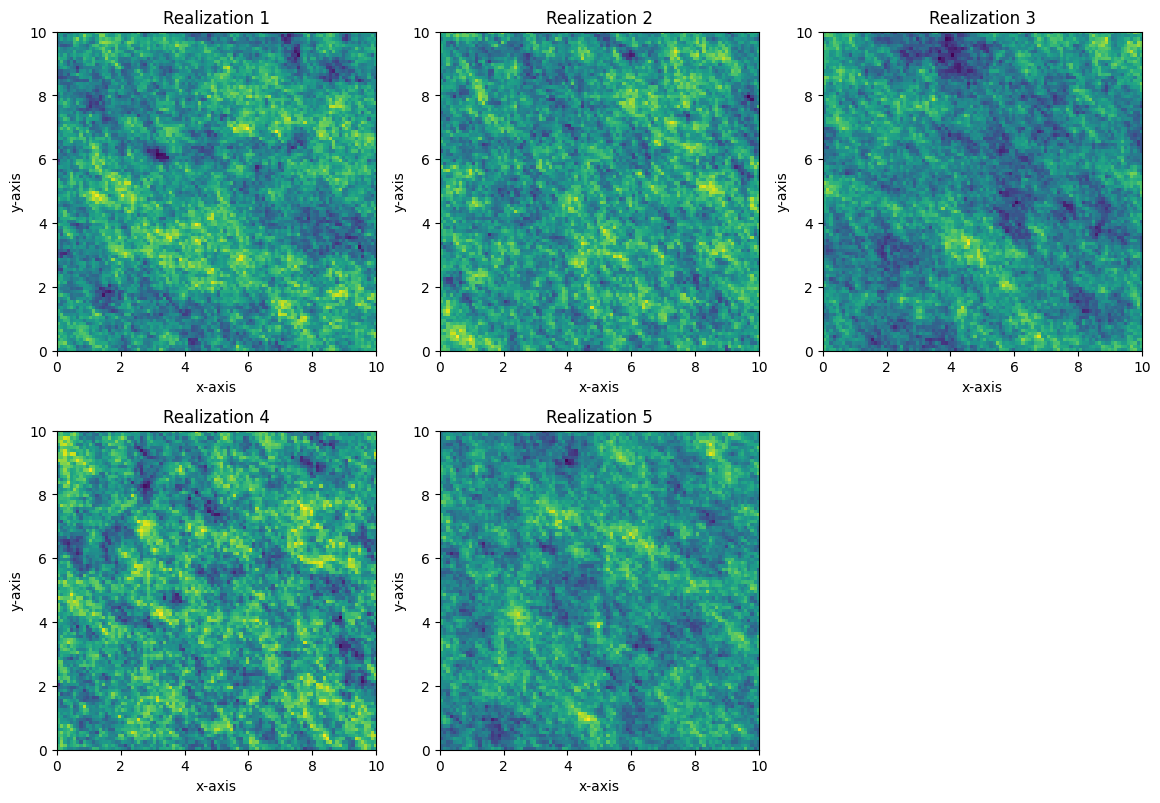

In [27]:
# Plots de delta(x,y)
figure, fig = plt.subplots(2,3)
# plt.suptitle('Density contrast $\\delta(\\vec{r})$ in real space')
# Realization 1
fig[0,0].imshow(delta1_2D.real, cmap='viridis', origin='lower', extent=(0, 10, 0, 10))
fig[0,0].set_title(r'Realization 1')
# Realization 2
fig[0,1].imshow(delta2_2D.real, cmap='viridis', origin='lower', extent=(0, 10, 0, 10))
fig[0,1].set_title(r'Realization 2')
# Realization 3
fig[0,2].imshow(delta3_2D.real, cmap='viridis', origin='lower', extent=(0, 10, 0, 10))
fig[0,2].set_title(r'Realization 3')
# Realization 4
fig[1,0].imshow(delta4_2D.real, cmap='viridis', origin='lower', extent=(0, 10, 0, 10))
fig[1,0].set_title(r'Realization 4')
# Realization 5
fig[1,1].imshow(delta5_2D.real, cmap='viridis', origin='lower', extent=(0, 10, 0, 10))
fig[1,1].set_title(r'Realization 5')

fig[-1,-1].axis('off')

for ax in fig.flat:
    ax.set(xlabel='x-axis', ylabel='y-axis')
plt.rcParams["figure.figsize"] = (14,9.5)
plt.show()